In [1]:
!pip install kaggle opencv-python

In [2]:
import os
import cv2
import numpy as np
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt


In [3]:
dataset = "iamsouravbanerjee/animal-image-dataset-90-different-animals"
download_path = "./animal_dataset"
os.makedirs(download_path, exist_ok=True)

api.dataset_download_files(dataset, path=download_path, unzip=True)
print("Dataset downloaded.")


NameError: name 'api' is not defined

In [4]:
api = KaggleApi()
api.authenticate()
dataset = "iamsouravbanerjee/animal-image-dataset-90-different-animals"
download_path = "./animal_dataset"
os.makedirs(download_path, exist_ok=True)

api.dataset_download_files(dataset, path=download_path, unzip=True)
print("Dataset downloaded.")


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
Dataset downloaded.


In [ ]:
dataset_path = "./animal_dataset/animals/animals"
classes = sorted(os.listdir(dataset_path))

print("Number of classes:", len(classes))
print(classes[:10])

Number of classes: 90
['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat']


In [24]:
plt.figure(figsize=(12, 12))

for i, class_name in enumerate(classes[:9]):  # first 9 classes only
    class_folder = os.path.join(dataset_path, class_name)
    
    img_name = os.listdir(class_folder)[0]    # pick first image
    img_path = os.path.join(class_folder, img_name)

    # Read original image (BGR)
    img = cv2.imread("some_image.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 1200x1200 with 0 Axes>

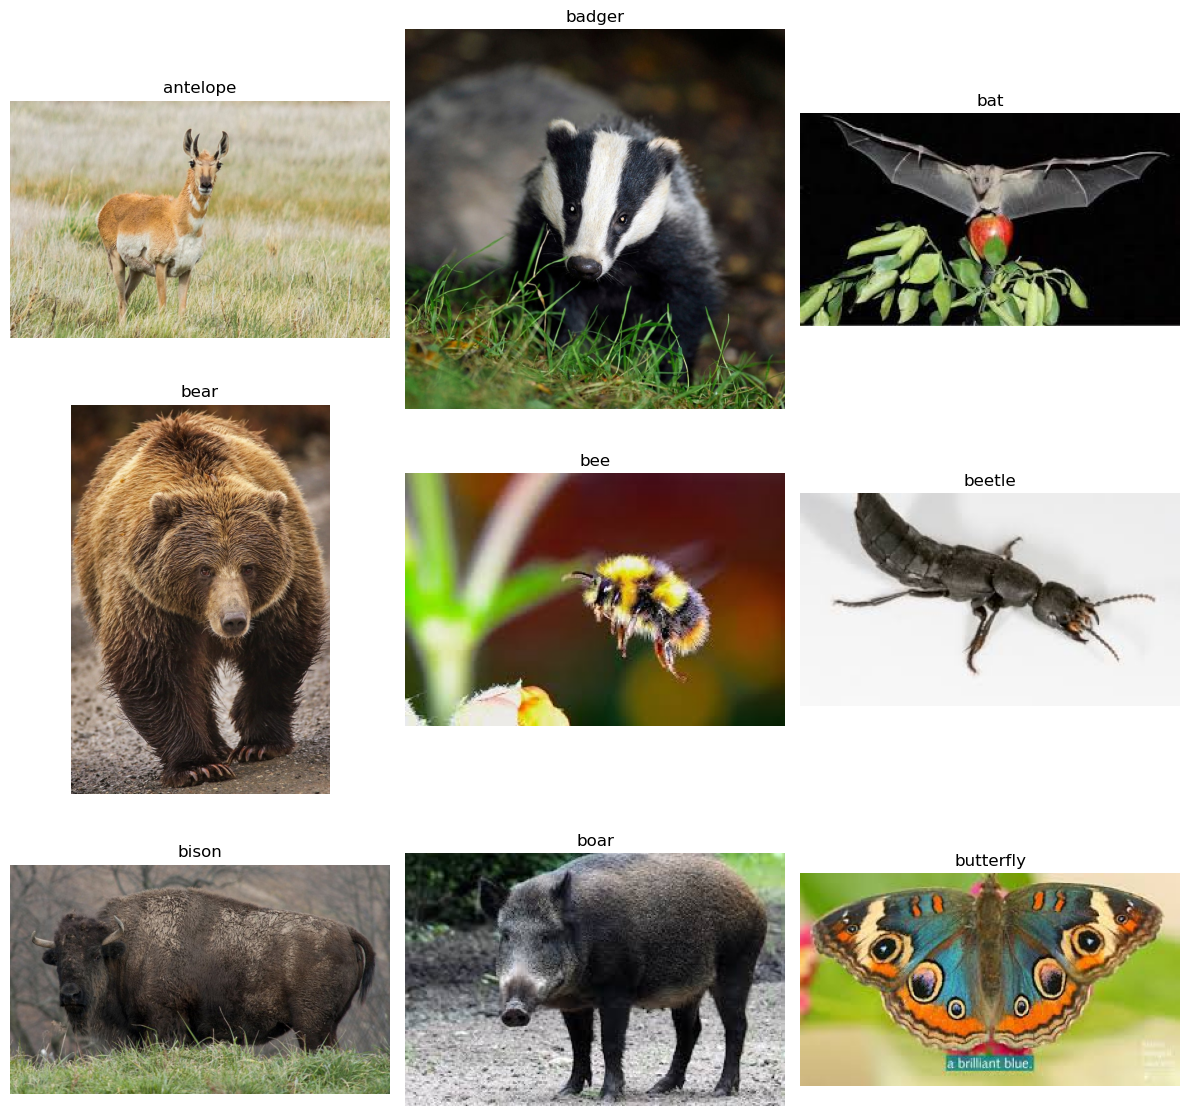

In [12]:
plt.figure(figsize=(12, 12))

for i, class_name in enumerate(classes[:9]):  # first 9 classes only
    class_folder = os.path.join(dataset_path, class_name)
    
    img_name = os.listdir(class_folder)[0]    # pick first image
    img_path = os.path.join(class_folder, img_name)

    # Read original image (BGR)
    img = cv2.imread(img_path)

    # Convert to RGB for correct colors
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [17]:
image_data = []   # list to store all images
label_data = []   # list to store labels (0–89)

IMG_SIZE = 255     # resize target size


In [18]:
for label_index, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_folder)

    for img_name in image_files:
        img_path = os.path.join(class_folder, img_name)

        img = cv2.imread(img_path)       # load image (BGR)
        if img is None:
            continue

        resized = cv2.resize(img, 255)  # resize

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # convert to RGB

        image_data.append(img)
        label_data.append(label_index)


error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Input argument doesn't provide sequence protocol
>  - Can't parse 'dsize'. Input argument doesn't provide sequence protocol


In [19]:
for label_index, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_folder)

    for img_name in image_files:
        img_path = os.path.join(class_folder, img_name)

        img = cv2.imread(img_path)       # load image (BGR)
        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # resize

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # convert to RGB

        image_data.append(img)
        label_data.append(label_index)


In [20]:
image_data = np.array(image_data)
label_data = np.array(label_data)

print("Images shape:", image_data.shape)
print("Labels shape:", label_data.shape)


Images shape: (5400, 255, 255, 3)
Labels shape: (5400,)


In [21]:
import os

resized_path = "./resized_dataset"
os.makedirs(resized_path, exist_ok=True)
for idx, img in enumerate(image_data):
    class_name = classes[label_data[idx]]
    save_folder = os.path.join(resized_path, class_name)
    os.makedirs(save_folder, exist_ok=True)

    save_path = os.path.join(save_folder, f"{idx}.jpg")
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(save_path, img_bgr)
classes = sorted(os.listdir(resized_path))



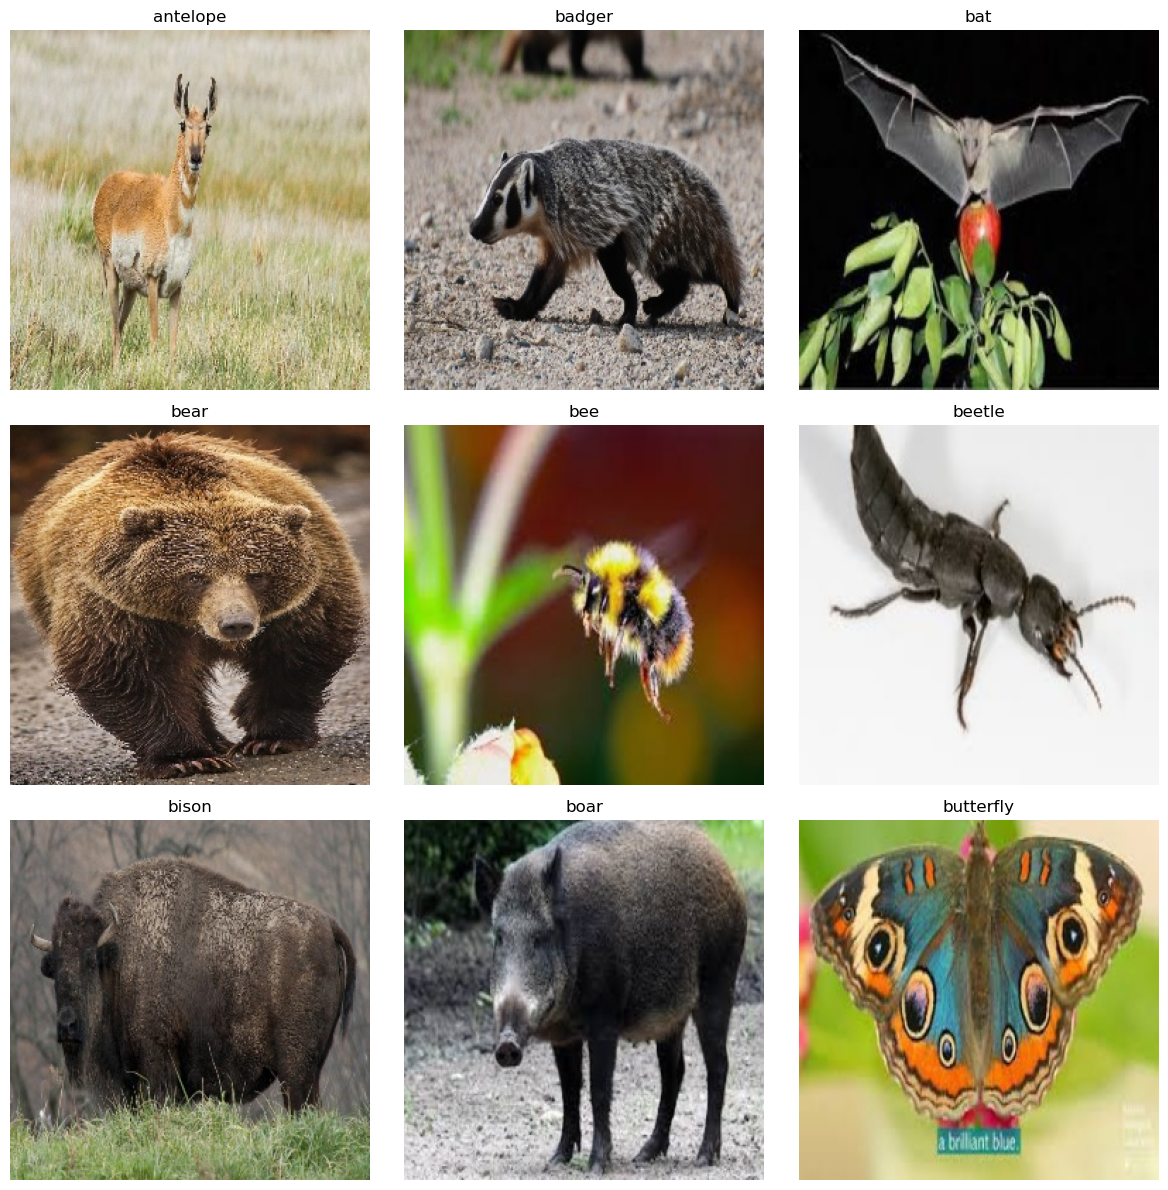

In [22]:
plt.figure(figsize=(12, 12))

for i, class_name in enumerate(classes[:9]):
    class_folder = os.path.join(resized_path, class_name)

    img_name = os.listdir(class_folder)[0]
    img_path = os.path.join(class_folder, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()